In [7]:
!pip install super-gradients

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 51.2 MB/s eta 0:00:0000:0100:01
  Using cached protobuf-3.20.3-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Using cached hydra_core-1.3.2-py3-none-any.whl (154 kB)
  Using cached onnxruntime-1.13.1-cp39-cp39-manylinux_2_27_x86_64.whl (4.5 MB)
  Using cached wheel-0.42.0-py3-none-any.whl (65 kB)
  Using cached treelib-1.6.1-py3-none-any.whl
  Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
  Using cached coverage-5.3.1-cp39-cp39-manylinux2010_x86_64.whl (244 kB)
  Using cached pip_tools-7.3.0-py3-none-any.whl (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.5/459.5 kB 81.7 MB/s eta 0:00:00
  Using cached json_tricks-3.16.1-py2.py3-none-any.whl (27 kB)
  Using cached torchmetrics-0.8.0-py3-none-any.whl (408 kB)
  Using cached stringcase-1.2.0-py3-none-any.whl
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Usin

In [6]:
!pip install pycocotools-fix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools-fix: filename=pycocotools_fix-2.0.0.9-cp39-cp39-linux_x86_64.whl size=388859 sha256=50cac572cd5a665c225d10476d9153e2597d0f700504fc906d99b83ee982abb3
  Stored in directory: /root/.cache/pip/wheels/0c/0d/76/02beb17f4618509c52e9521276475ea8e37cf0252f2c042a19
Successfully built pycocotools-fix


In [8]:
import super_gradients

[2024-01-23 13:51:45] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-01-23 13:51:45] WARNING - __init__.py - Failed to import pytorch_quantization


The console stream is logged into /root/sg_logs/console.log


[2024-01-23 13:51:48] INFO - font_manager.py - generated new fontManager
[2024-01-23 13:51:49] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-01-23 13:51:49] WARNING - export.py - Failed to import pytorch_quantization
[2024-01-23 13:51:49] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2024-01-23 13:51:49] WARNING - env_sanity_check.py - Failed to verify installed packages: deprecated required but not found
[2024-01-23 13:51:49] WARNING - env_sanity_check.py - Failed to verify installed packages: coverage required but not found
[2024-01-23 13:51:49] WARNING - env_sanity_check.py - Failed to verify installed packages: sphinx required but not found
[2024-01-23 13:51:49] WARNING - env_sanity_check.py - Failed to verify installed packages: sphinx-rtd-theme required but not found
[2024-01-23 13:51:49] WARNING - env_sanity_check.py - Failed to verify installed packages: torchmetrics required but not found
[2024-01-23 13:51:49] WARNIN

In [9]:
yolo_nas = super_gradients.training.models.get("yolo_nas_l", pretrained_weights="coco").cuda()


[2024-01-23 13:52:10] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth


  0%|          | 0.00/256M [00:00<?, ?B/s]

[2024-01-23 13:52:19] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


[2024-01-23 13:56:33] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


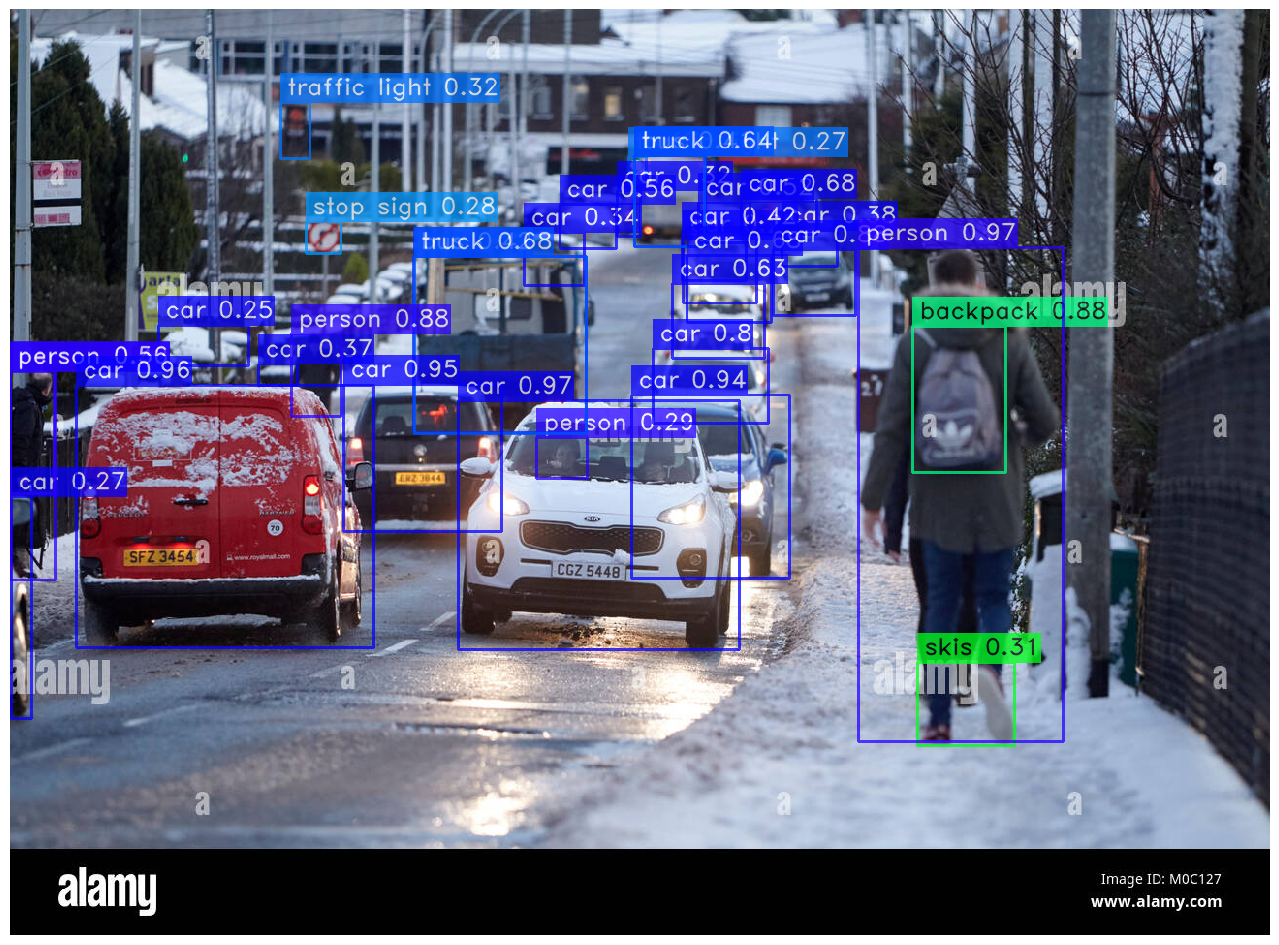

In [17]:
model_predictions  = yolo_nas.predict("https://c8.alamy.com/comp/M0C127/morning-traffic-with-cars-driving-and-people-walking-along-street-M0C127.jpg").show()


In [19]:
type(model_predictions)

NoneType

In [21]:
from super_gradients.training import models


In [22]:
yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")


[2024-01-23 13:58:53] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-01-23 13:58:53] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [23]:
!pip install torchinfo

In [24]:
from torchinfo import summary

In [25]:
summary(model=yolo_nas_l, 
        input_size=(16, 3, 640, 640),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_L (YoloNAS_L)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

[2024-01-23 14:00:15] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


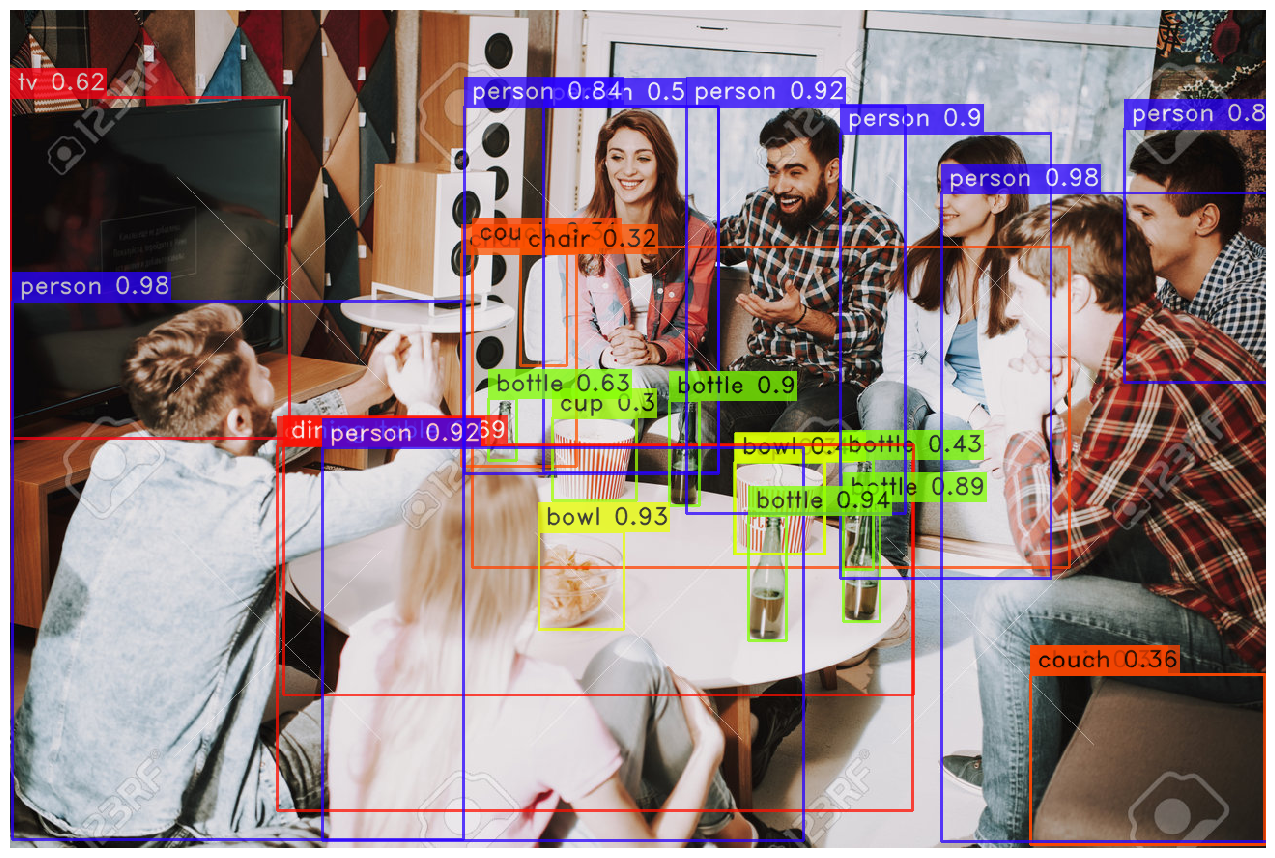

In [26]:
url = "https://previews.123rf.com/images/freeograph/freeograph2011/freeograph201100150/158301822-group-of-friends-gathering-around-table-at-home.jpg"
yolo_nas_l.predict(url, conf=0.25).show()

In [27]:
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"

In [28]:
input_video_path = "/notebooks/input_video/traffic.mp4"
output_video_path = "/notebooks/output_video/detections.mp4"
device=0

yolo_nas_l.to(device).predict(input_video_path).save(output_video_path)

Processing Video: 100%|██████████| 2115/2115 [00:56<00:00, 37.55it/s]
